## Importing Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [5]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Yahoo Finance
### Stock Price of all 3 companies downloaded from Yahoo

In [7]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [8]:
yahoo_financials = YahooFinancials('TCS.NS')
data = yahoo_financials.get_historical_price_data(start_date='2015-01-01',        # Start Date is 2015 and End Date is 2022
                                                  end_date='2022-10-09', 
                                                  time_interval='daily')
TCS = pd.DataFrame(data['TCS.NS']['prices'])
TCS = TCS.drop('date', axis=1).set_index('formatted_date')
TCS.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2015-01-01,1283.500000,1270.500000,1283.500000,1272.775024,366830.0,1097.643921
2015-01-02,1295.474976,1275.300049,1275.500000,1289.724976,925740.0,1112.261841
2015-01-05,1299.949951,1262.324951,1290.500000,1270.125000,1754242.0,1095.358643
2015-01-06,1264.550049,1220.000000,1264.550049,1223.300049,2423784.0,1054.976929
2015-01-07,1239.574951,1203.724976,1235.000000,1208.849976,2636332.0,1042.515015


In [9]:
yahoo_financials = YahooFinancials('KOTAKBANK.NS')
data = yahoo_financials.get_historical_price_data(start_date='2015-01-01', 
                                                  end_date='2022-10-09', 
                                                  time_interval='daily')
KotakBank = pd.DataFrame(data['KOTAKBANK.NS']['prices'])
KotakBank = KotakBank.drop('date', axis=1).set_index('formatted_date')
KotakBank.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2015-01-01,632.500000,625.549988,631.900024,629.299988,501996.0,626.716248
2015-01-02,639.500000,629.150024,630.500000,635.775024,1263630.0,633.164795
2015-01-05,639.424988,631.000000,636.049988,633.224976,610230.0,630.625244
2015-01-06,631.125000,616.775024,627.500000,625.674988,2269086.0,623.106262
2015-01-07,651.974976,623.750000,623.750000,635.750000,3571774.0,633.139893


In [10]:
yahoo_financials = YahooFinancials('BAJAJ-AUTO.NS')
data = yahoo_financials.get_historical_price_data(start_date='2015-01-01', 
                                                  end_date='2022-10-09', 
                                                  time_interval='daily')
BajajAuto = pd.DataFrame(data['BAJAJ-AUTO.NS']['prices'])
BajajAuto = BajajAuto.drop('date', axis=1).set_index('formatted_date')
BajajAuto.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2015-01-01,2458.300049,2428.449951,2431.000000,2452.149902,72928.0,1965.861084
2015-01-02,2476.399902,2432.000000,2457.000000,2451.750000,164726.0,1965.540283
2015-01-05,2481.199951,2450.000000,2452.000000,2460.699951,118873.0,1972.715332
2015-01-06,2469.899902,2430.000000,2454.300049,2441.500000,580496.0,1957.323120
2015-01-07,2475.600098,2432.050049,2442.000000,2447.199951,189191.0,1961.892944


In [11]:
BajajAuto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1919 entries, 2015-01-01 to 2022-10-07
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      1918 non-null   float64
 1   low       1918 non-null   float64
 2   open      1918 non-null   float64
 3   close     1918 non-null   float64
 4   volume    1918 non-null   float64
 5   adjclose  1918 non-null   float64
dtypes: float64(6)
memory usage: 104.9+ KB


In [12]:
# Create Portfolio is and importing close price in the data. 
# This will help in calculating Return
p1 = BajajAuto[['close']]
p2 = TCS[['close']]
p3 = KotakBank[['close']]

In [13]:
# Computing Normal Return
for stock_df in (p1, p2, p3):
    stock_df['Normed Return'] = stock_df['close']/ stock_df.iloc[0]['close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# **Allocation:**

20% to BajajAuto, 30% to TCS and 50% to Kotak Bank stocks. And assume that the investment was 500,000.

In [14]:
for stock_df, allo in zip((p1, p2, p3),[0.2,0.3,0.5]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Computing the Position Amount 
for stock_df in (p1, p2, p3):
    stock_df['Position Amount']= stock_df['Allocation']*500000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Portfolio Value:

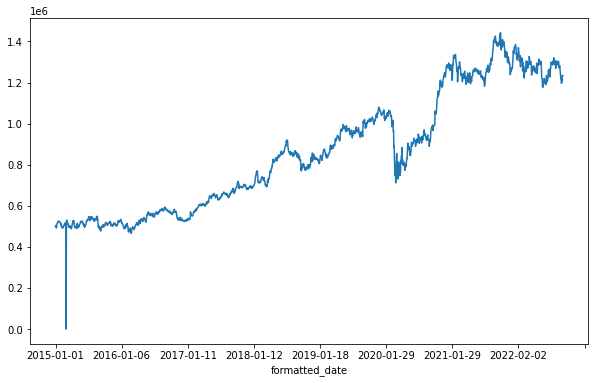

In [16]:
# Computing the Return and plot the graphs based on Position Amount and Date
total_pos_vals = [p1['Position Amount'], p2['Position Amount'], p3['Position Amount']]
portf_vals = pd.concat(total_pos_vals, axis = 1)
portf_vals.columns = ['BajajAuto Pos', 'TCS Pos', 'KotakBank Pos']
portf_vals['Total Pos'] = portf_vals.sum(axis=1)
portf_vals['Total Pos'].plot(figsize = (10,6))

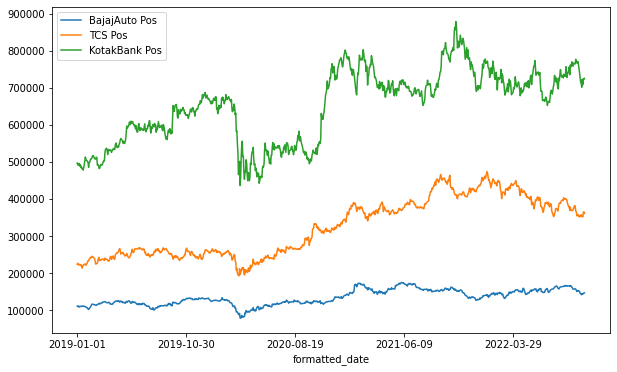

In [17]:
# Ploting all companies based on Return based on Date
portf_vals['2019-01-01':].drop('Total Pos', axis = 1).plot(figsize=(10,6))

In [20]:
# Computing Daily Return Average and Daily Return Standard Deviation
portf_vals['Daily Return'] = portf_vals['Total Pos'].pct_change(1)
portf_vals.dropna(inplace = True)
print('Daily Return Average: ',portf_vals['Daily Return'].mean())
print('Daily Return Standard Deviation: ',portf_vals['Daily Return'].std())

Daily Return Average:  0.0005518160940630708
Daily Return Standard Deviation:  0.013029992433266458


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)


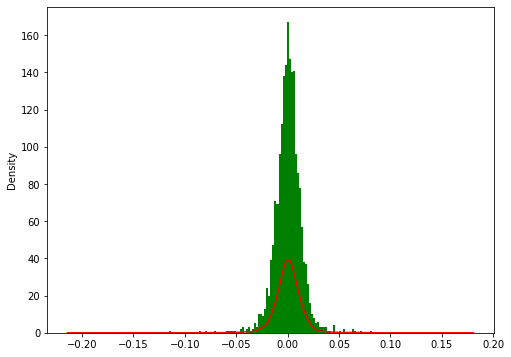

In [21]:
# Ploting Daily Return
portf_vals['Daily Return'].plot(kind = 'hist', bins=100, figsize = (6,8), color = 'green')
portf_vals['Daily Return'].plot(kind = 'kde', figsize = (8,6), color = 'R');

In [22]:
# Computing Cumulative Return 
cumulative_return = 100*(portf_vals['Total Pos'][-1]/portf_vals['Total Pos'][0]-1)
print('Cumulative return: ', cumulative_return)

Cumulative return:  145.881799641748


In [23]:
# Computing Sharpe Ratio
SR = portf_vals['Daily Return'].mean()/portf_vals['Daily Return'].std()
print('Sharpe Ratio = ', SR)

Sharpe Ratio =  0.04234968645524664


In [24]:
#Annual Sharpe Ratio:
ASR = (252**0.5) * SR
print('Annualized Sharpe Ratio = ', ASR)

Annualized Sharpe Ratio =  0.6722804307728589


In [25]:
# Stocks Price of Bajaj Auto, TCS and Kotak Bank
stocks = pd.concat([p1['close'], p2['close'], p3['close']], axis = 1)
stocks.columns = ['BajajAuto', 'TCS', 'KotakBank']
stocks.head()

,BajajAuto,TCS,KotakBank
formatted_date,,,
2015-01-01,2452.149902,1272.775024,629.299988
2015-01-02,2451.750000,1289.724976,635.775024
2015-01-05,2460.699951,1270.125000,633.224976
2015-01-06,2441.500000,1223.300049,625.674988
2015-01-07,2447.199951,1208.849976,635.750000


In [26]:
# Mean of closing price of Bajaj Auto, TCS and Kotak Bank
stocks.pct_change(1).mean()

BajajAuto    0.000336
TCS          0.000578
KotakBank    0.000710
dtype: float64

In [27]:
# Correlation between the Bajaj Auto, TCS and Kotak Bank
stocks.pct_change(1).corr()

,BajajAuto,TCS,KotakBank
BajajAuto,1.000000,0.232937,0.350264
TCS,0.232937,1.000000,0.225500
KotakBank,0.350264,0.225500,1.000000


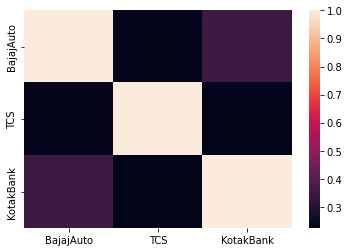

In [45]:
# Heatmap for Correlation
sns.heatmap(stocks.pct_change(1).corr())

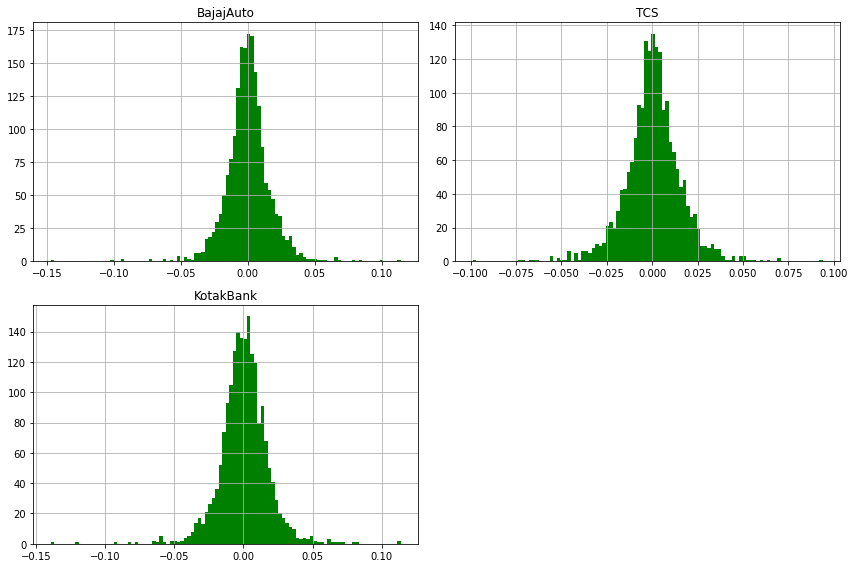

In [28]:
# Ploting Return of all Stock
log_returns = np.log(stocks/stocks.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'g')
plt.tight_layout()

In [29]:
# Computing Covariance
log_returns.cov()*252

,BajajAuto,TCS,KotakBank
BajajAuto,0.068141,0.015115,0.026223
TCS,0.015115,0.060595,0.015804
KotakBank,0.026223,0.015804,0.077909


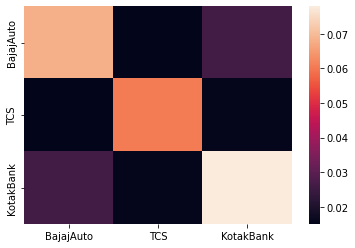

In [46]:
# Heatmap for Covariance
sns.heatmap(log_returns.cov()*252)

## Sharpe Ratio for One Portfolio Model

In [30]:
np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(3))

print('Random Weights: ')
print(weights)

#However, their sum must be equal to 100
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['BajajAuto', 'TCS', 'KotakBank'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423]
Rebalance
[0.46291341 0.51156154 0.02552505]


In [31]:
# Expected Returns
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return: ',exp_ret)

Expected Portfolio Return:  0.08799793437903267


In [32]:
# Expected Volatility
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)

Expected Volatility:  0.1967260841665945


In [33]:
# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  0.4473119807768498


## Choosing an optimal portfolio Allocation

In [34]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(3))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [35]:
sharpe_arr.max()

0.6037362611337289

In [36]:
# Index Location for the best allocation
sharpe_arr.argmax()

3245

In [37]:
# Here is optimal allocation for our portfolio
all_weights[sharpe_arr.argmax(),:]

array([0.00195702, 0.51659808, 0.4814449 ])

## Let plot data

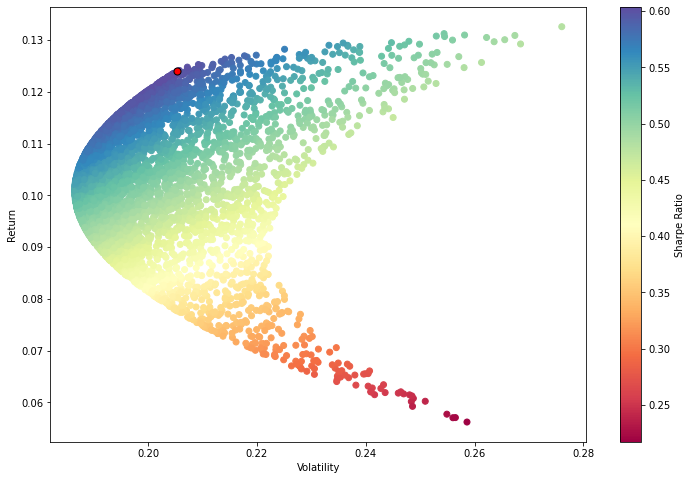

In [38]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='Spectral')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

So our Optimal Sharpe Ration is 0.60 and Optimal Portfolio Allocation is 0.00% for Bajaj Auto, 51.65% for TCS, and 48.15% for Kotak Bank. So, I would conclude to substitute IMB shares to something more profitable.